# Sample code online for calculating the autocorrelation time
(random code)


[ 1.00000000e+00  9.99700000e-01  9.99400000e-01 ... -8.99460066e-04
 -5.99760024e-04 -2.99940006e-04]


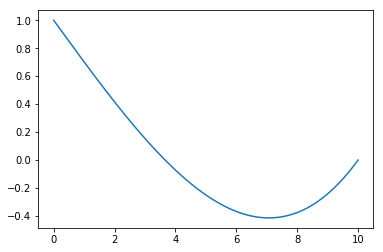

In [124]:
import numpy as np
import matplotlib.pyplot as mp
def next_pow_two(n):
    i = 1
    while i < n:
        i = i << 1
    return i

def autocorr_func_1d(x, norm=True):
    x = np.atleast_1d(x)
    if len(x.shape) != 1:
        raise ValueError("invalid dimensions for 1D autocorrelation function")
    n = next_pow_two(len(x))

    # Compute the FFT and then (from that) the auto-correlation function
    f = np.fft.fft(x - np.mean(x), n=2*n)
    acf = np.fft.ifft(f * np.conjugate(f))[:len(x)].real
    acf /= 4*n

    # Optionally normalize
    if norm:
        acf /= acf[0]

    return acf
x_0=np.linspace(0,10,10000)
y_0=autocorr_func_1d(x_0)
print(y_0)
mp.plot(x_0,y_0)

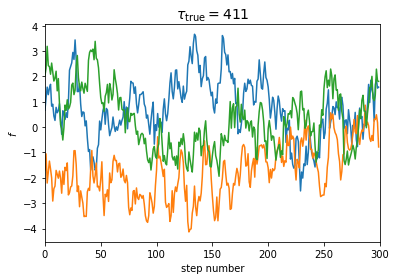

In [125]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1234)

# Build the celerite model:
import celerite
from celerite import terms
kernel = terms.RealTerm(log_a=0.0, log_c=-6.0)
kernel += terms.RealTerm(log_a=0.0, log_c=-2.0)
 
# The true autocorrelation time can be calculated analytically:
true_tau = sum(2*np.exp(t.log_a-t.log_c) for t in kernel.terms)
true_tau /= sum(np.exp(t.log_a) for t in kernel.terms)
true_tau

# Simulate a set of chains:
gp = celerite.GP(kernel)
t = np.arange(2000000)
gp.compute(t)
y = gp.sample(size=32)

# Let's plot a little segment with a few samples:
plt.plot(y[:3, :300].T)
plt.xlim(0, 300)
plt.xlabel("step number")
plt.ylabel("$f$")
plt.title("$\\tau_\mathrm{{true}} = {0:.0f}$".format(true_tau), fontsize=14);

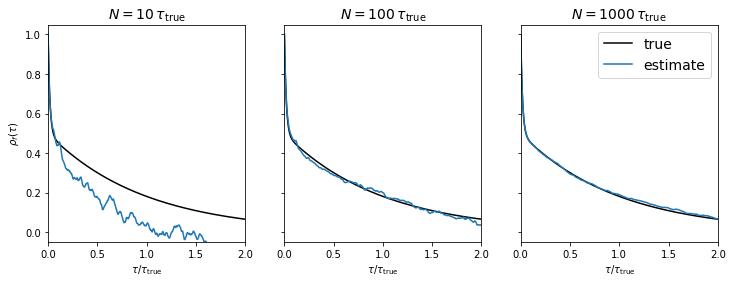

In [126]:
def next_pow_two(n):
    i = 1
    while i < n:
        i = i << 1
    return i

def autocorr_func_1d(x, norm=True):
    x = np.atleast_1d(x)
    if len(x.shape) != 1:
        raise ValueError("invalid dimensions for 1D autocorrelation function")
    n = next_pow_two(len(x))

    # Compute the FFT and then (from that) the auto-correlation function
    f = np.fft.fft(x - np.mean(x), n=2*n)
    acf = np.fft.ifft(f * np.conjugate(f))[:len(x)].real
    acf /= 4*n

    # Optionally normalize
    if norm:
        acf /= acf[0]

    return acf

# Make plots of ACF estimate for a few different chain lengths
window = int(2*true_tau)
tau = np.arange(window+1)
f0 = kernel.get_value(tau) / kernel.get_value(0.0)

# Loop over chain lengths:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharex=True, sharey=True)
for n, ax in zip([10, 100, 1000], axes):
    nn = int(true_tau * n)
    ax.plot(tau / true_tau, f0, "k", label="true")
    ax.plot(tau / true_tau, autocorr_func_1d(y[0, :nn])[:window+1], label="estimate")
    ax.set_title(r"$N = {0}\,\tau_\mathrm{{true}}$".format(n), fontsize=14)
    ax.set_xlabel(r"$\tau / \tau_\mathrm{true}$")

axes[0].set_ylabel(r"$\rho_f(\tau)$")
axes[-1].set_xlim(0, window / true_tau)
axes[-1].set_ylim(-0.05, 1.05)
axes[-1].legend(fontsize=14);

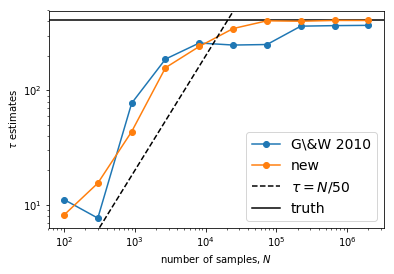

In [127]:
# Automated windowing procedure following Sokal (1989)
def auto_window(taus, c):
    m = np.arange(len(taus)) < c * taus
    if np.any(m):
        return np.argmin(m)
    return len(taus) - 1

# Following the suggestion from Goodman & Weare (2010)
def autocorr_gw2010(y, c=5.0):
    f = autocorr_func_1d(np.mean(y, axis=0))
    taus = 2.0*np.cumsum(f)-1.0
    window = auto_window(taus, c)
    return taus[window]

def autocorr_new(y, c=5.0):
    f = np.zeros(y.shape[1])
    for yy in y:
        f += autocorr_func_1d(yy)
    f /= len(y)
    taus = 2.0*np.cumsum(f)-1.0
    window = auto_window(taus, c)
    return taus[window]

# Compute the estimators for a few different chain lengths
N = np.exp(np.linspace(np.log(100), np.log(y.shape[1]), 10)).astype(int)
gw2010 = np.empty(len(N))
new = np.empty(len(N))
for i, n in enumerate(N):
    gw2010[i] = autocorr_gw2010(y[:, :n])
    new[i] = autocorr_new(y[:, :n])

# Plot the comparisons
plt.loglog(N, gw2010, "o-", label="G\&W 2010")
plt.loglog(N, new, "o-", label="new")
ylim = plt.gca().get_ylim()
plt.plot(N, N / 50.0, "--k", label=r"$\tau = N/50$")
plt.axhline(true_tau, color="k", label="truth", zorder=-100)
plt.ylim(ylim)
plt.xlabel("number of samples, $N$")
plt.ylabel(r"$\tau$ estimates")
plt.legend(fontsize=14);

# Find the AutoCorrelation time 

[ 1.00000000e+00  9.99700000e-01  9.99400000e-01 ... -8.99460066e-04
 -5.99760024e-04 -2.99940006e-04]


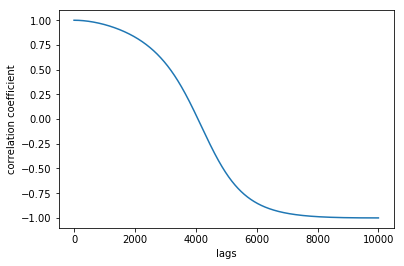

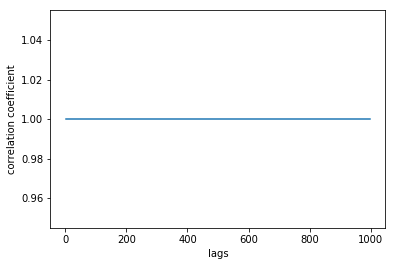

In [135]:
import numpy as np
import matplotlib.pyplot as plt
lin=np.linspace(0,10,1000)
lin=np.array(lin)
 
def lag_verse_cc(lin):
    hold_y=list()
    hold_x=list()
    for i in range (1,len(lin)-1):
        
        lin_0=lin[i:]
        lin_1=lin[:-i]
        
        hold_y.append(np.corrcoef(lin_1,lin_0)[0,1])
        hold_x.append(i)
    return hold_x,hold_y
#**************************************
def step_verse_cc(lin):
    hold_y=list()
    hold_x=list()
    index=0
    for i in range (1,len(lin)-2):
        while index<=len(lin):
            hold
        lin_0=lin[i:]
         
        lin_1=lin[:-i]
        
        hold_y.append(np.corrcoef(lin_1,lin_0)[0,1])
        hold_x.append(i)
    return hold_x,hold_y
#**************************************
#y_0 is the list of 1D MC series generated in the first part 
x0,y0=lag_verse_cc(y_0)
print (y_0)
 
plt.plot(x0,y0)
plt.xlabel('lags')
plt.ylabel('correlation coefficient')
plt.show()
#**************************************
lin=np.linspace(0,10,1000)
lin=np.array(lin)
x1,y1=lag_verse_cc(lin)
plt.plot(x1,y1)
plt.xlabel('lags')
plt.ylabel('correlation coefficient')
plt.show()



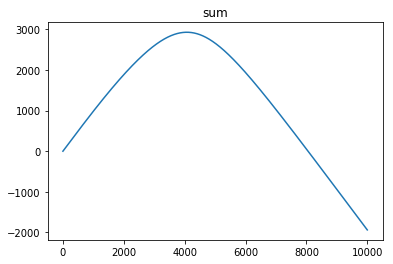

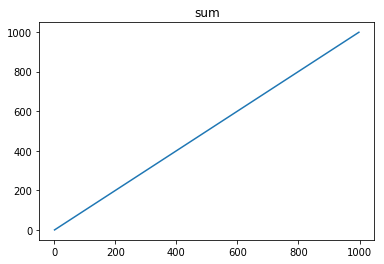

In [136]:
import copy
def sum_cc(y):
    hold=list()
    Sum=list()
    for i in y:
        hold.append(i)
        Sum.append(sum(hold))
    return Sum

y0=sum_cc(y0)
plt.plot(x0,y0)
plt.title('sum')
plt.show()
#**************************
y1=sum_cc(y1)
plt.plot(x1,y1)
plt.title('sum')
plt.show()

In [115]:
def func_max(y,x):
    for i in range(len(x)-1):
        delta_y=y[i]-y[i+1]
        delta_x=x[i]-x[i+1]
        num=float(delta_y)/float(delta_x)
        if num<0.001:
            print ('autocorrelation time is at '+str(x[i]) )
            return y[i],x[i]
    print ('no max')
y,x=func_max(y0,x0)
print ('max is ' + str(y))
print ('max is at '+ str(x)) 
#***************************
func_max(y1,x1)
#where max position is also the autocorrelation time

autocorrelation time is at 209
max is 36.67963953593374
max is at 209
no max


# Sample data Imported 

In [116]:
import pandas as pd
class_data=pd.read_csv("MC.txt")
print(len(class_data.keys()))

22


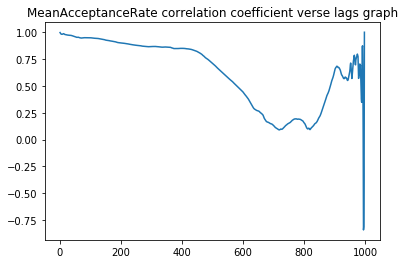

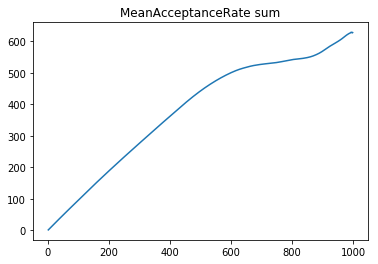

autocorrelation time is at 994
max is 629.4028069207726
max is at 994



/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


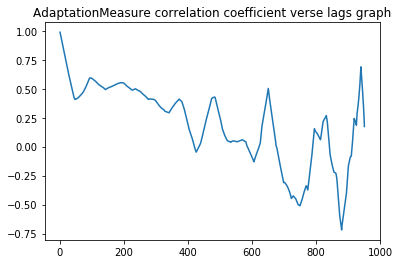

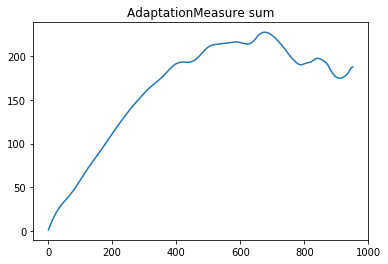

autocorrelation time is at 420
max is 193.54682162398217
max is at 420



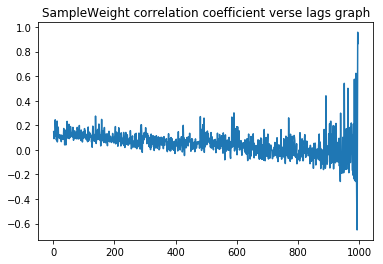

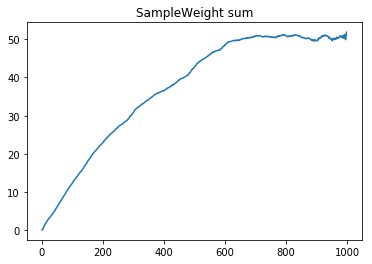

autocorrelation time is at 290
max is 29.946880790129985
max is at 290



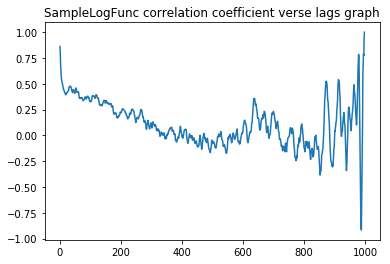

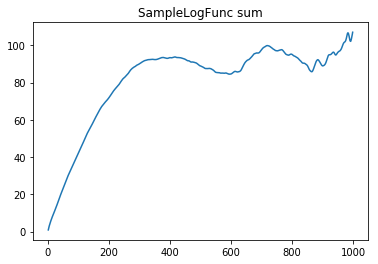

autocorrelation time is at 327
max is 92.3043529667826
max is at 327



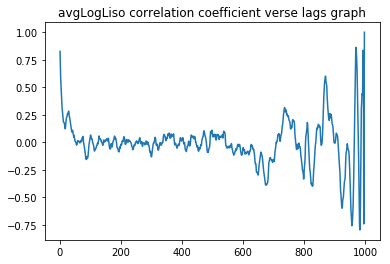

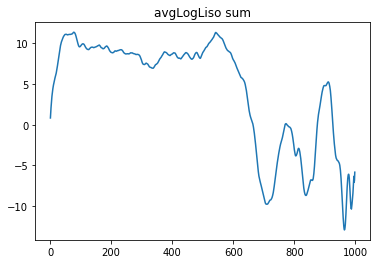

autocorrelation time is at 52
max is 11.134011957035671
max is at 52



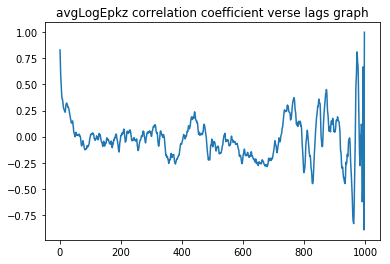

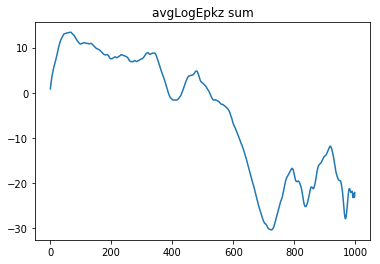

autocorrelation time is at 49
max is 13.098573695729584
max is at 49



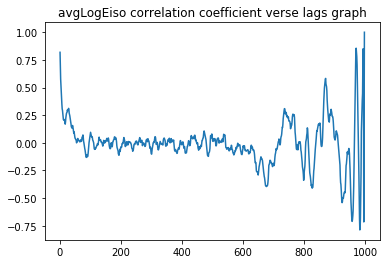

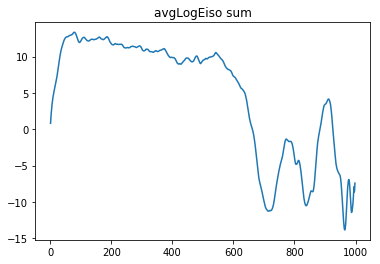

autocorrelation time is at 54
max is 12.705246183683633
max is at 54



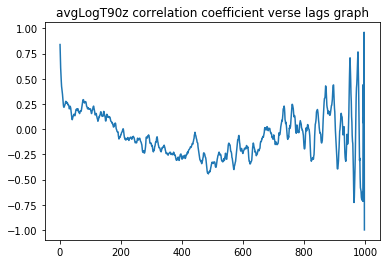

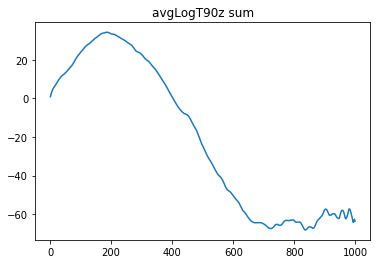

autocorrelation time is at 185
max is 34.21217601088288
max is at 185



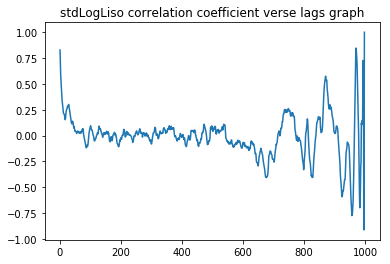

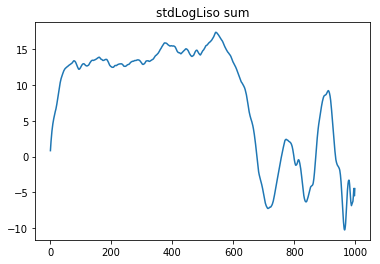

autocorrelation time is at 78
max is 13.393165896408465
max is at 78



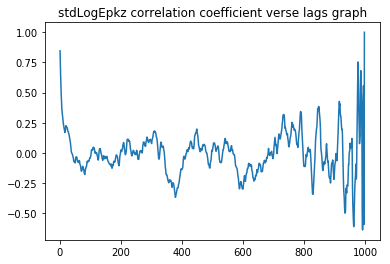

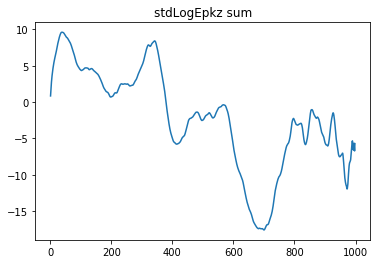

autocorrelation time is at 38
max is 9.593109227154164
max is at 38



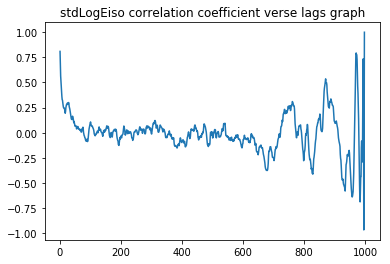

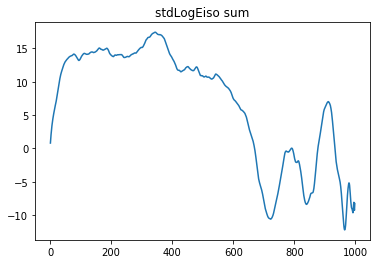

autocorrelation time is at 78
max is 14.132133545232772
max is at 78



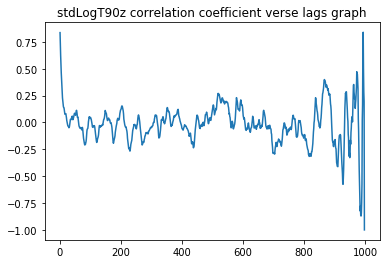

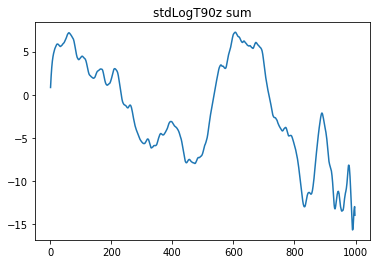

autocorrelation time is at 24
max is 5.867262440621947
max is at 24



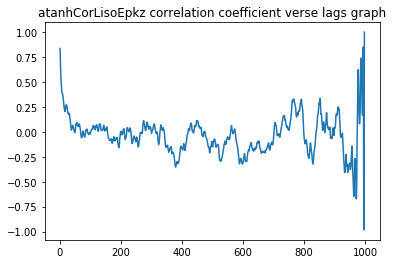

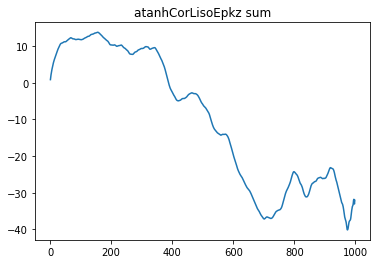

autocorrelation time is at 48
max is 11.161349410641943
max is at 48



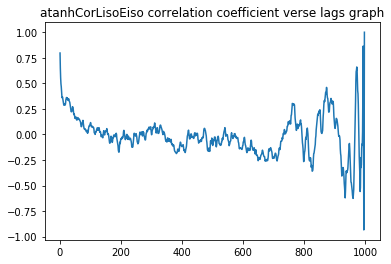

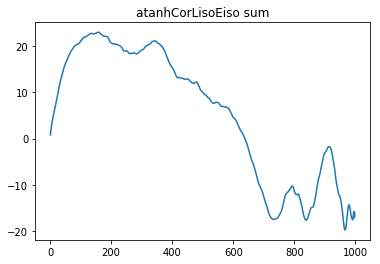

autocorrelation time is at 115
max is 22.05162588895189
max is at 115



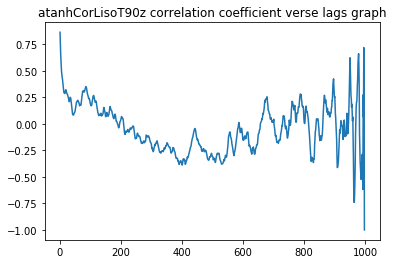

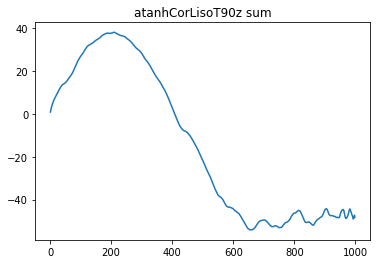

autocorrelation time is at 189
max is 37.71514652057685
max is at 189



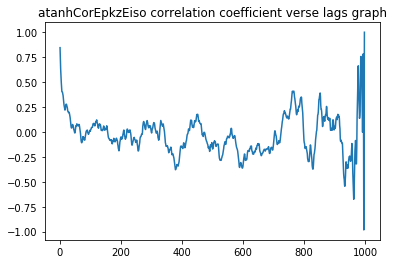

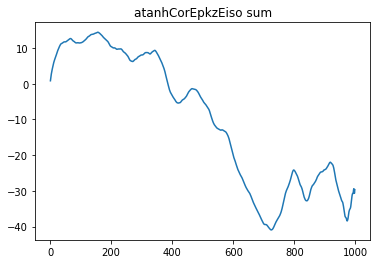

autocorrelation time is at 48
max is 11.755566132772316
max is at 48



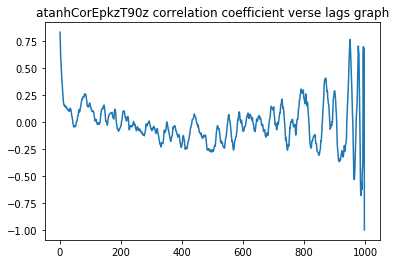

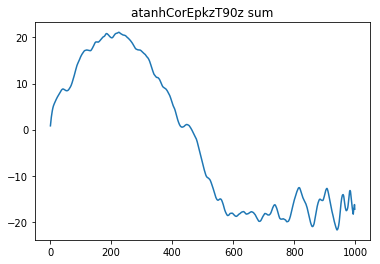

autocorrelation time is at 42
max is 8.825351368714488
max is at 42



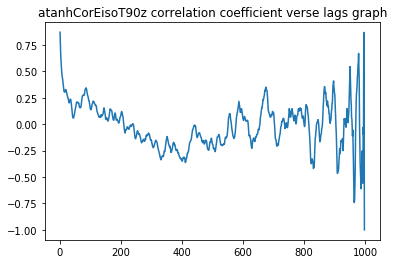

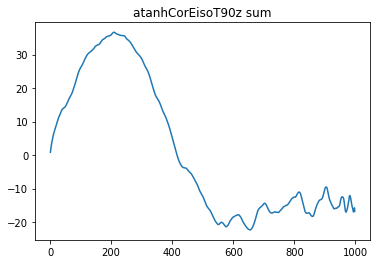

autocorrelation time is at 209
max is 36.67963953593374
max is at 209



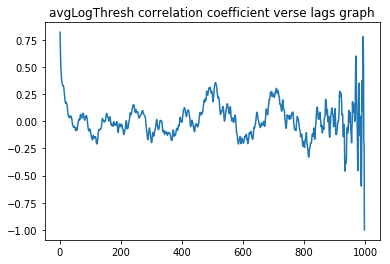

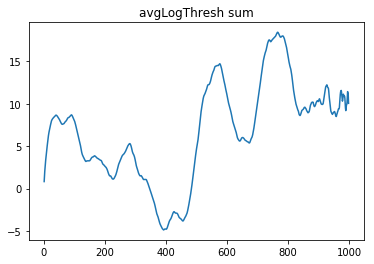

autocorrelation time is at 40
max is 8.650003758255133
max is at 40



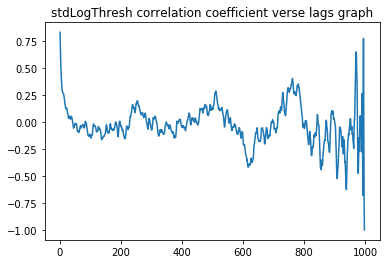

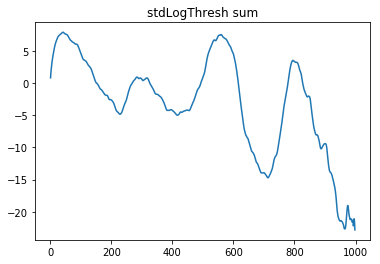

autocorrelation time is at 42
max is 7.928693183388313
max is at 42



In [120]:
for key in class_data.keys():
     if key!='ProcessorID' and key!='BurninLocation':
        lin=list(class_data[key])
        x,y=lag_verse_cc(lin[:1000])
        plt.plot(x,y)
        plt.title(key+' correlation coefficient verse lags graph')
        plt.show()
        y=sum_cc(y)
        plt.plot(x,y)
        plt.title(key+' sum')
        plt.show()
        y,x=func_max(y,x)
        print ('max is ' + str(y))
        print ('max is at '+ str(x)+'\n') 

Comparing the features of every ID 

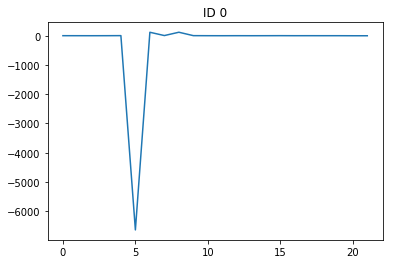

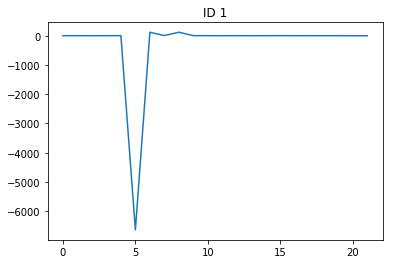

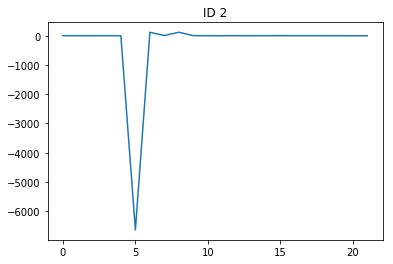

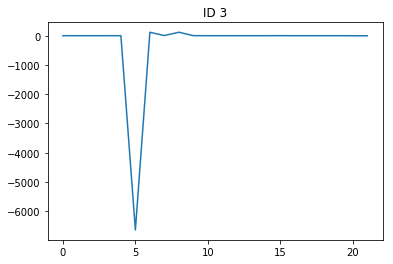

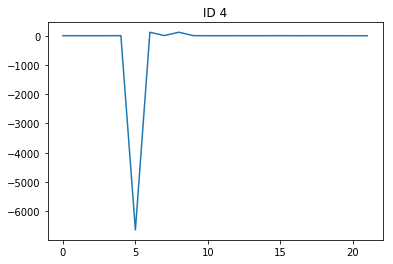

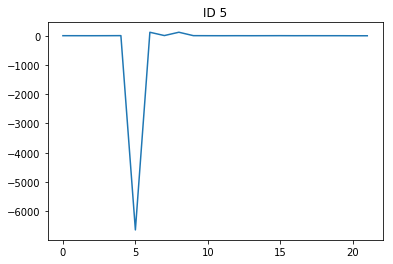

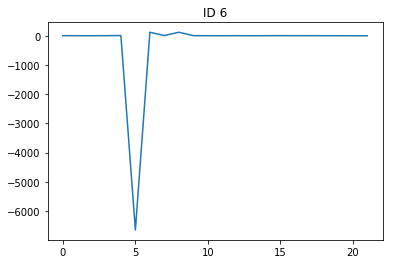

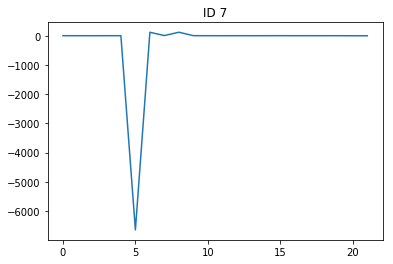

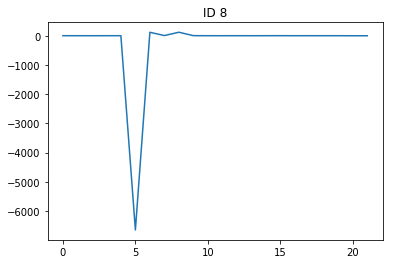

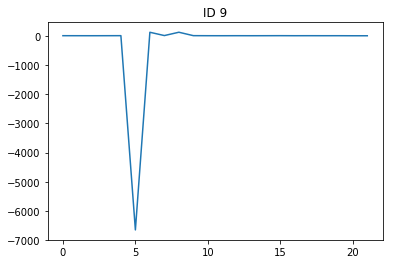

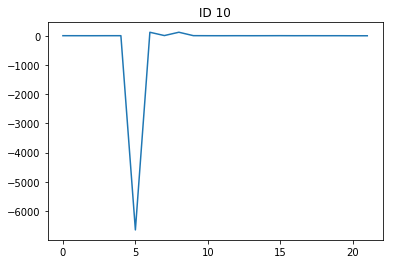

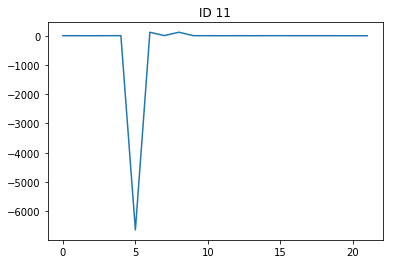

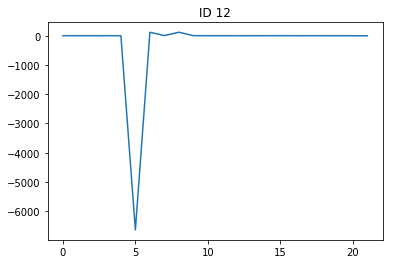

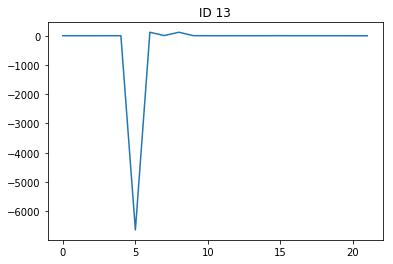

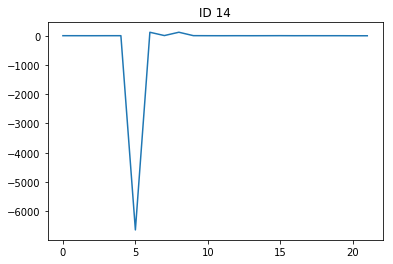

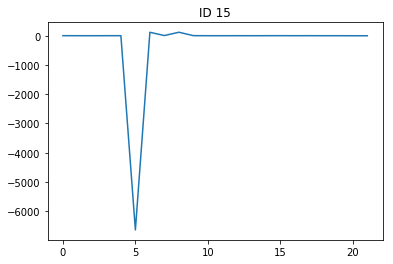

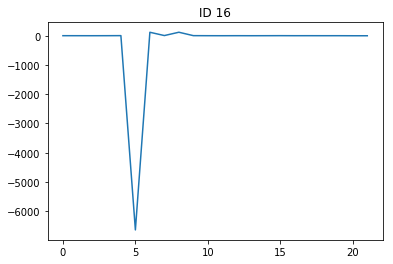

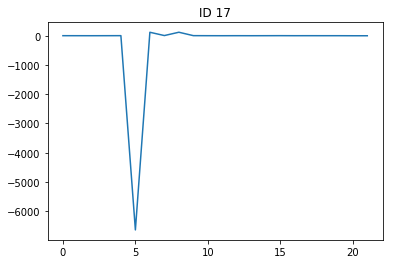

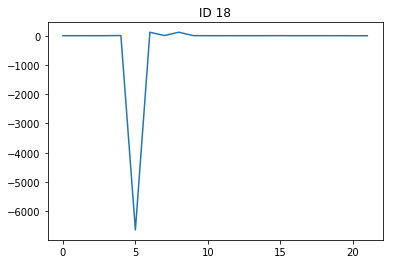

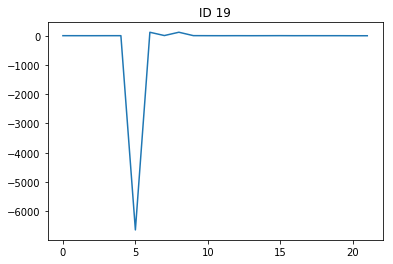

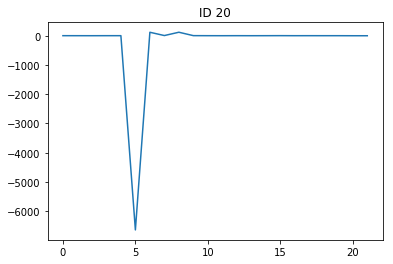

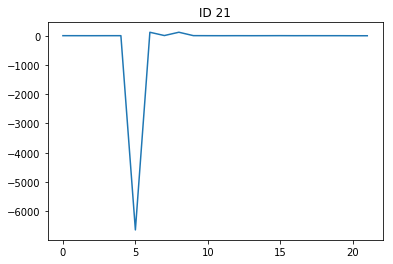

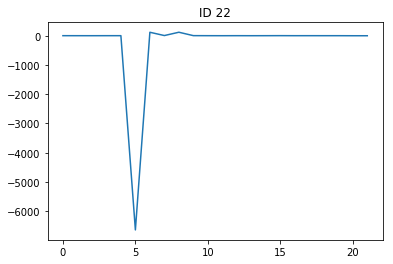

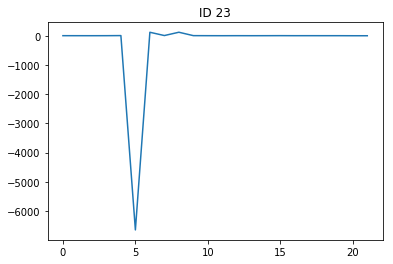

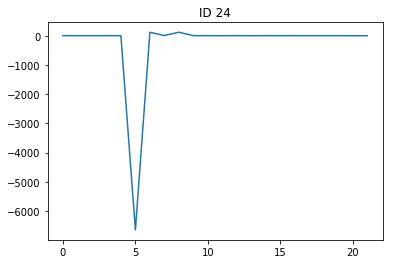

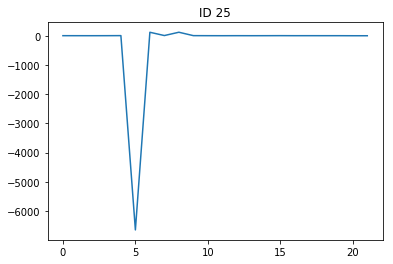

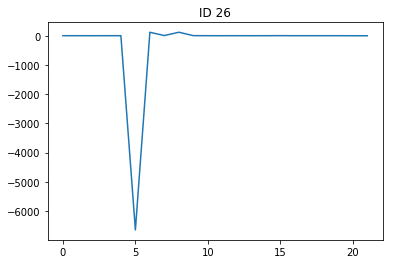

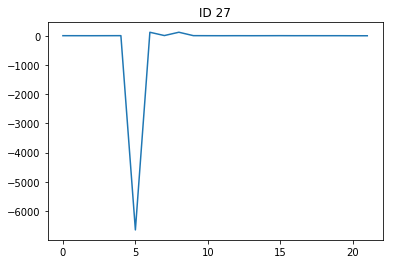

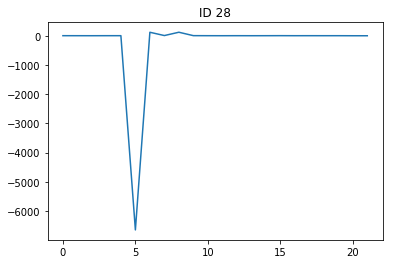

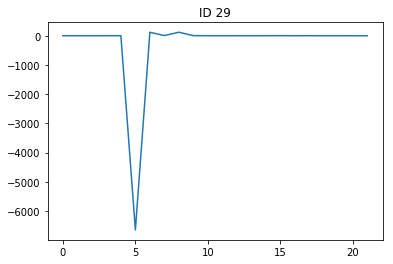

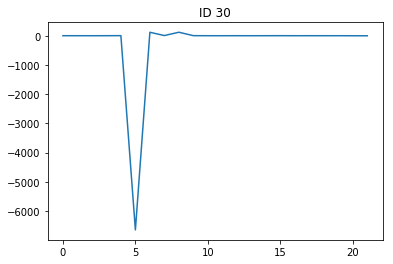

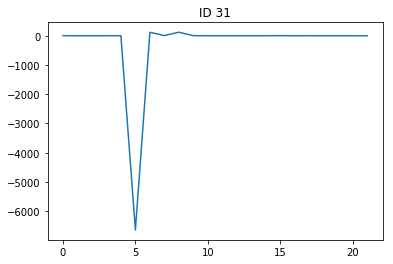

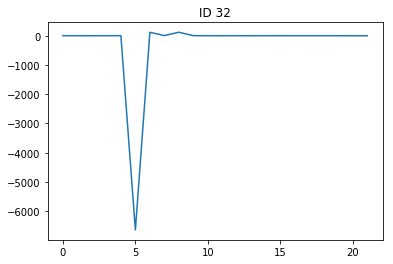

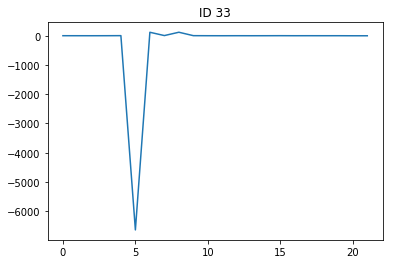

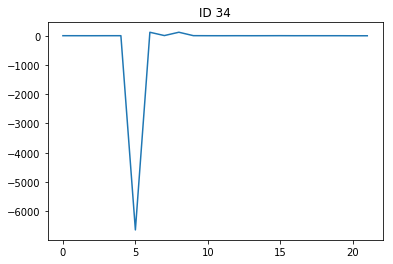

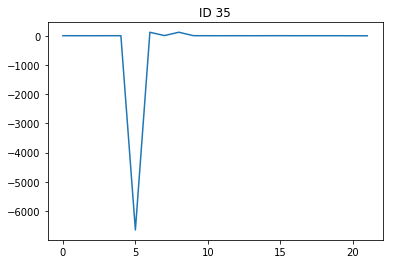

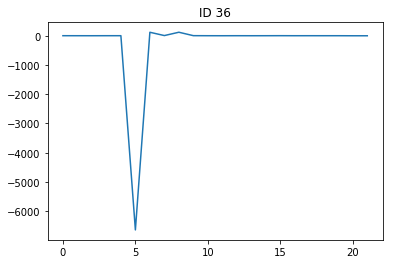

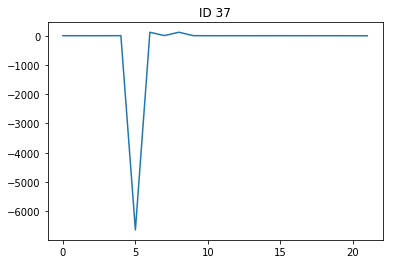

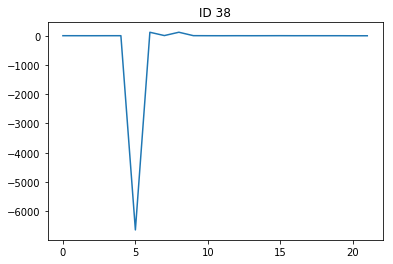

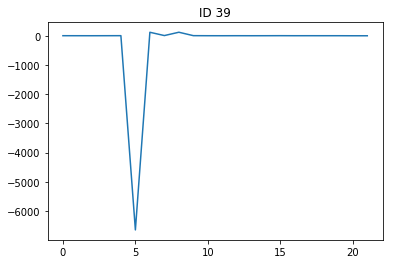

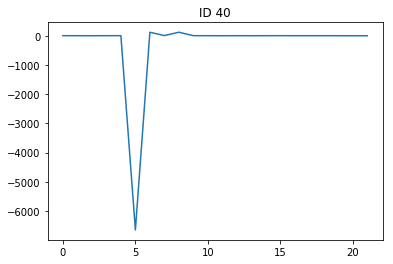

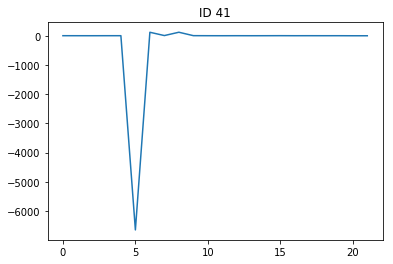

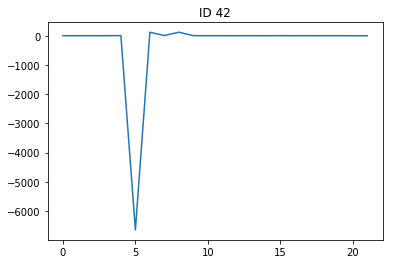

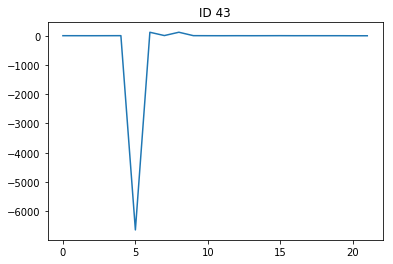

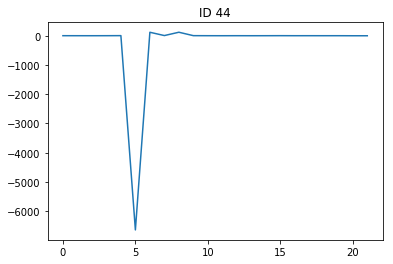

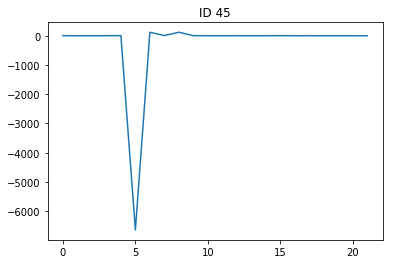

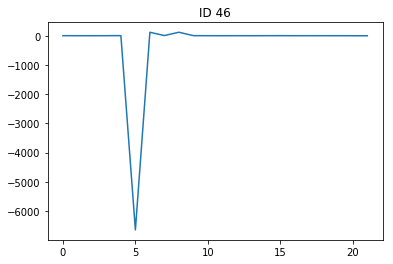

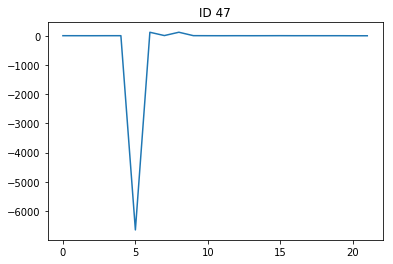

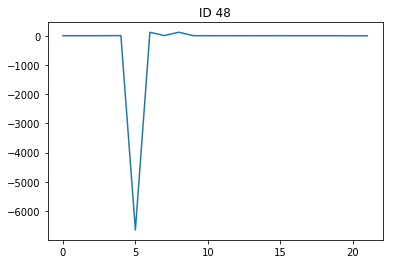

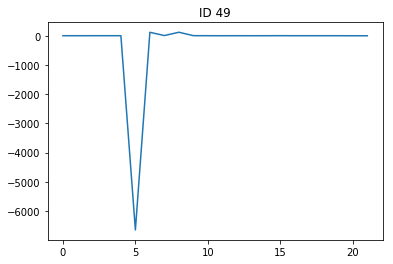

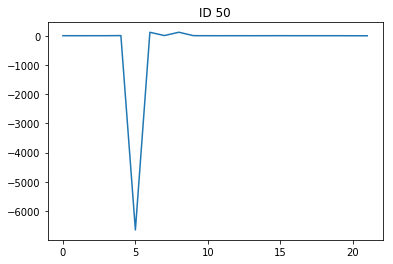

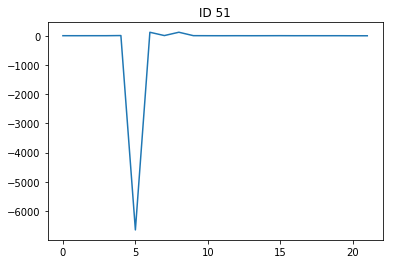

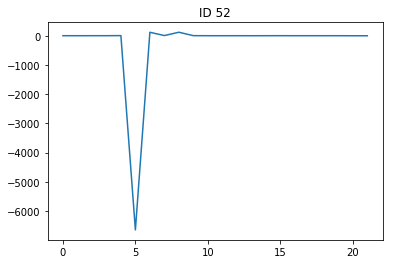

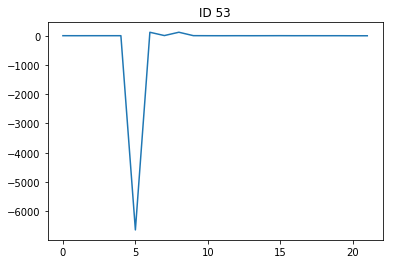

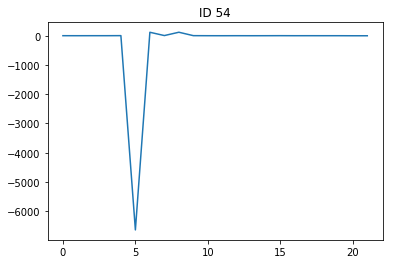

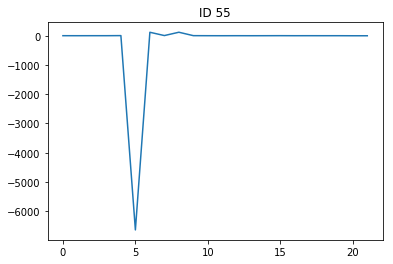

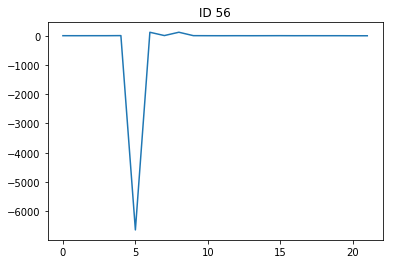

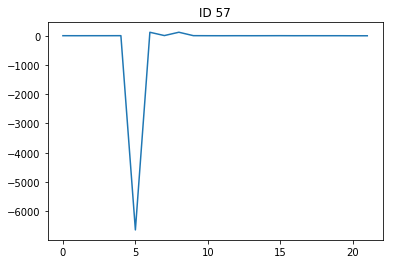

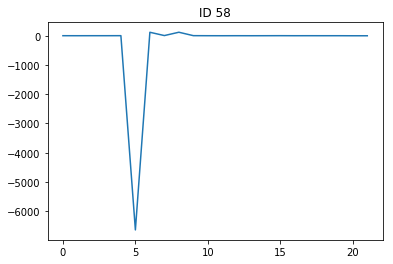

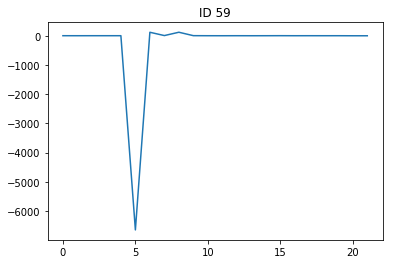

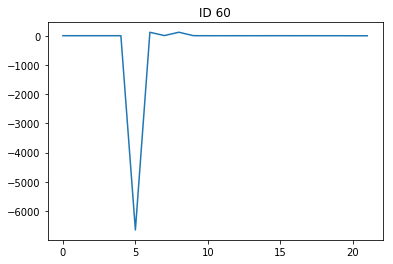

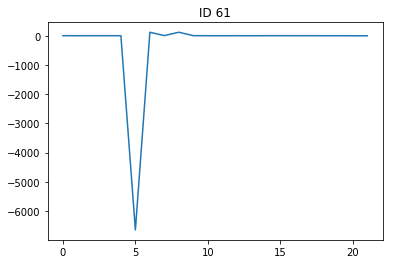

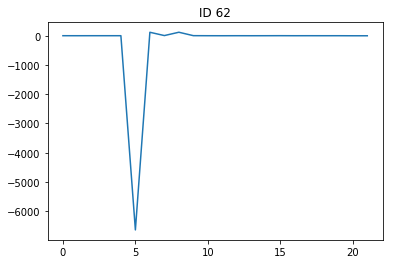

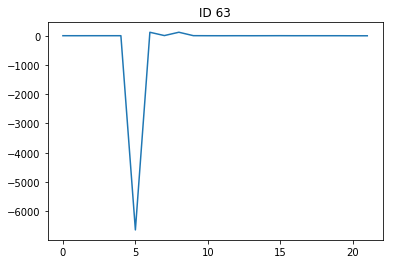

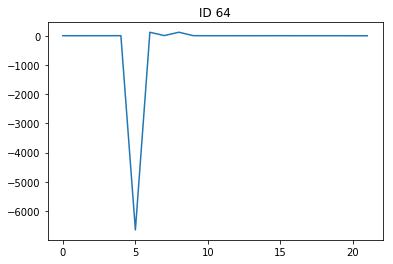

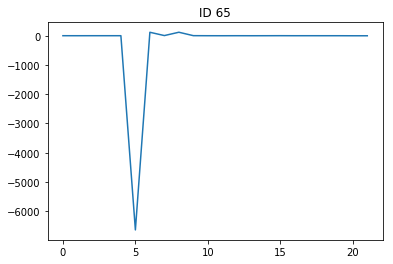

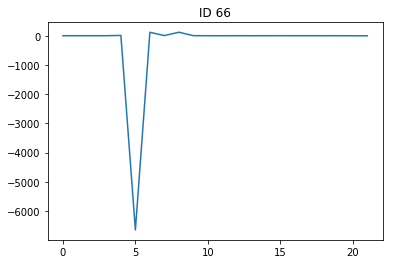

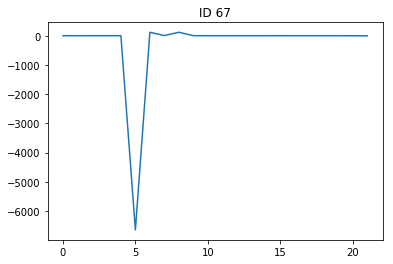

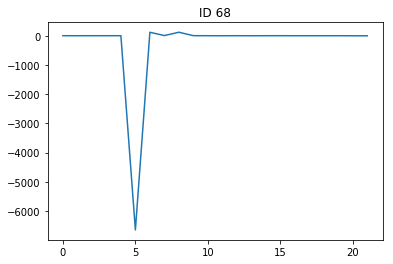

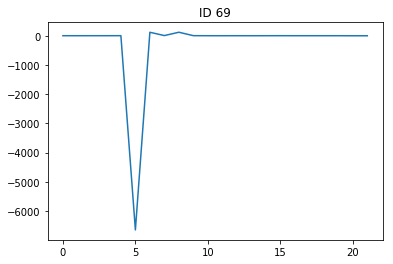

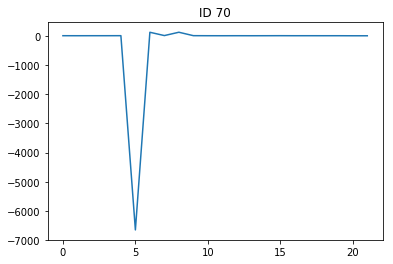

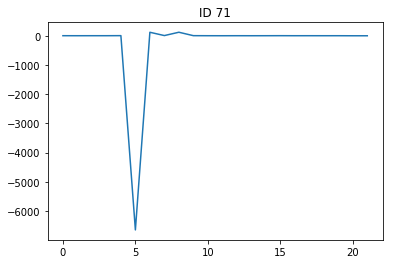

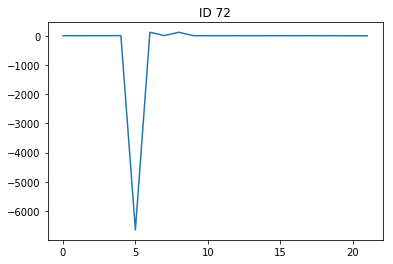

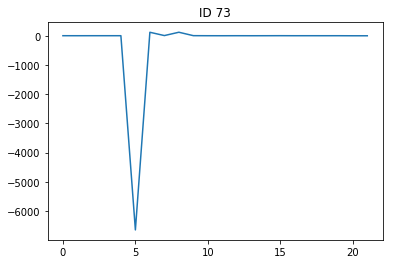

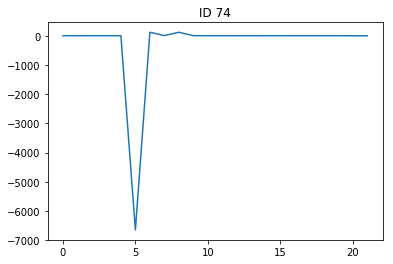

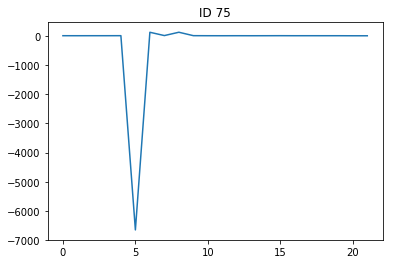

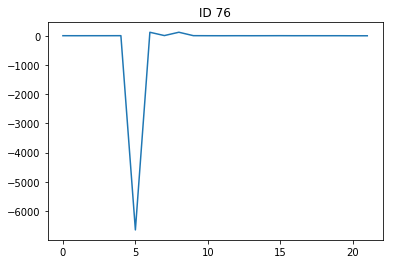

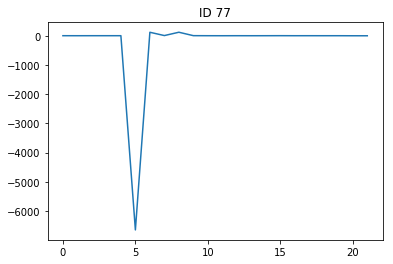

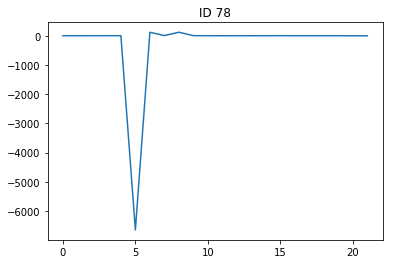

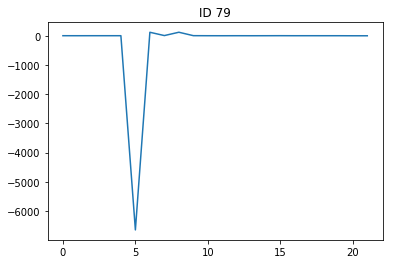

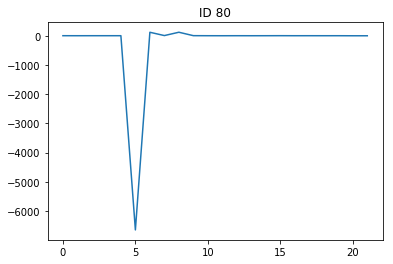

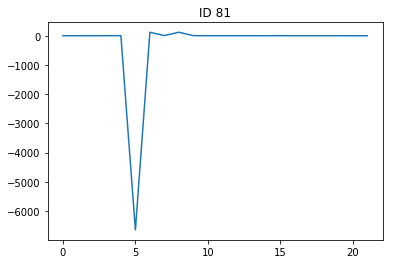

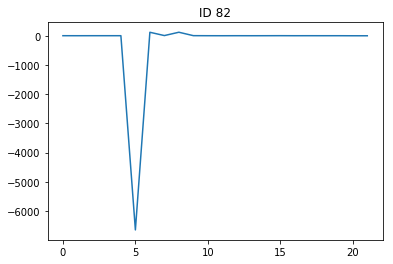

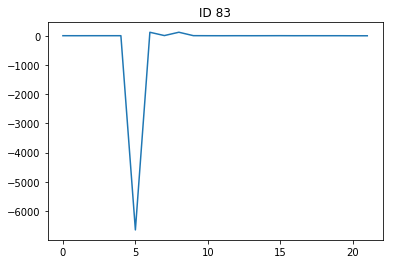

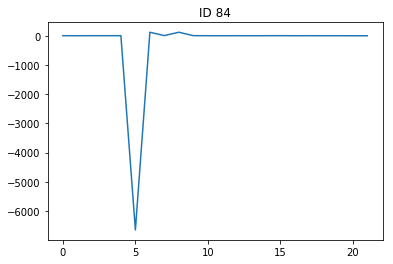

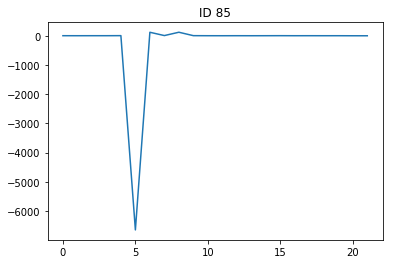

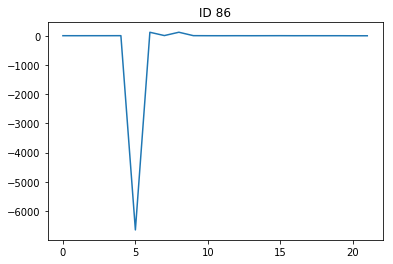

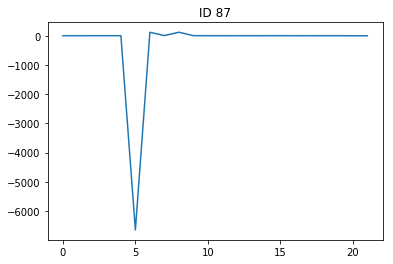

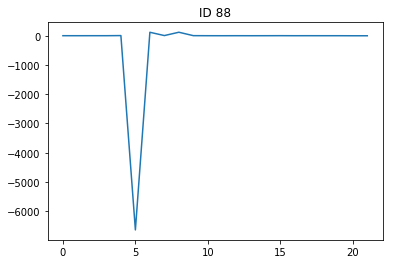

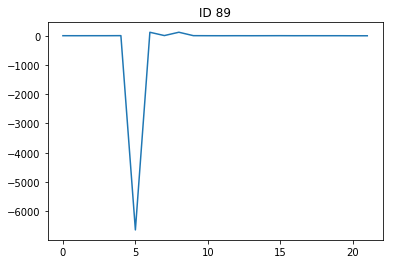

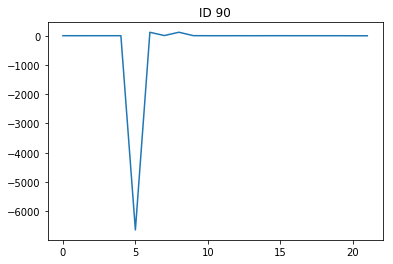

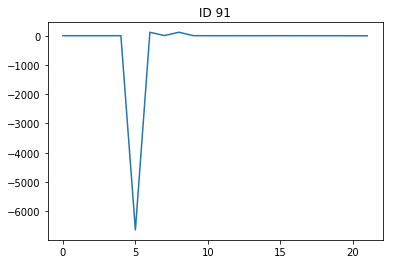

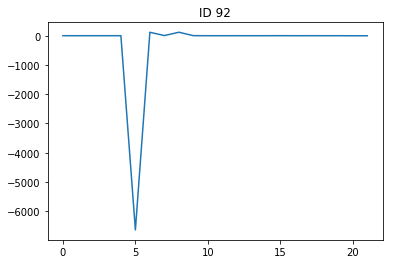

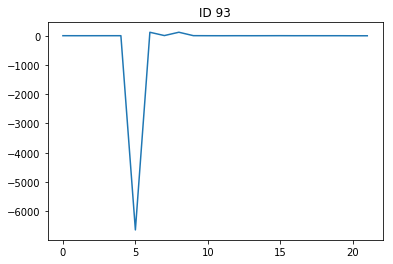

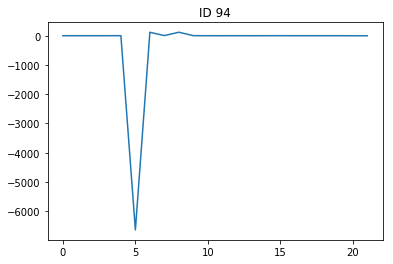

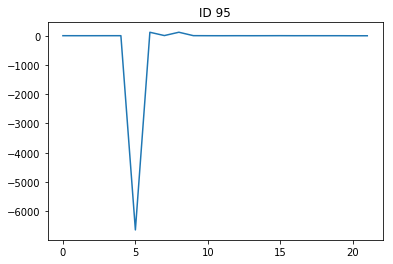

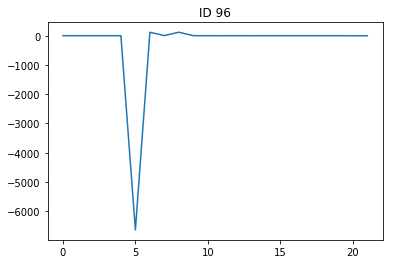

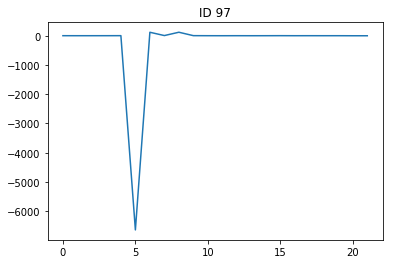

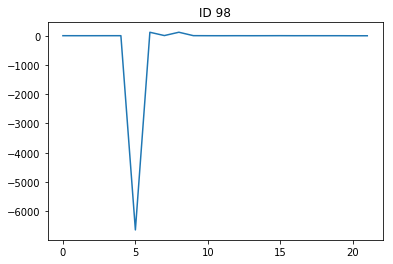

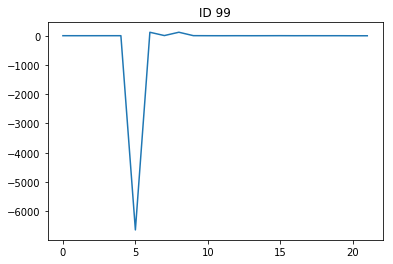

In [109]:
matrix=list()
for i in range(100):    
    li=list()
     
    
    x=np.linspace(0,21,22)
    for key in class_data.keys():
         
        li.append(class_data[key][i]) 
     
    plt.plot(x,li)
    plt.title('ID '+str(i))
    plt.show()
    matrix.append(li)
 
     


there are 10000 numbers of correlation coefficient


Text(0.5,1,'correlation coefficient value')

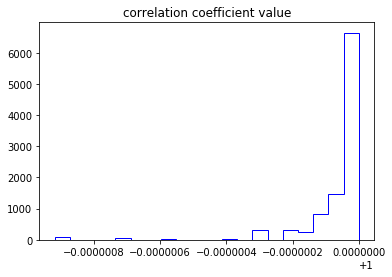

In [114]:
num=list()
 
for i in range(len(matrix)):
    for j in range(len(matrix)):
         num.append(np.corrcoef(matrix[i],matrix[j])[0,1])

print ('there are '+str(len(num))+' numbers of correlation coefficient')
plt.hist(num,20, histtype='step', align='mid', color='b', label='Test Score Data')
plt.title('correlation coefficient value')
#According to the grpah, we notice that most correlation coefficient values sits in the range between 0.97 to 1.0